# Exploratory data analysis of the tech survey results data set

In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

from sklearn.model_selection import train_test_split
pd.set_option("max_columns", 50)

In [2]:
survey_data = pd.read_csv('../data/raw/survey_results_public.csv')
country_selected = ['United States','Canada'] 
survey_data = survey_data.query('Country == @country_selected')

# Summary of the data set
The data set used in this project is from the salary and work information survey created by Stack Overflow in 2019. Since our project is aiming to predict tech compensation in the US and Canada, we only use the data from the United States and Canada. Each row in the data set represents working related information of a software technician, including the job title, education level, location, years of coding experience and technology, etc. All the data was collected from the online survey in 2019.

# Partition the data set into training and test sets
Before proceeding further, we will split the data such that 80% of observations are in the training and 20% of observations are in the test set. Below we list the summary information of the training data set, there are 19475 observations and 85 features.

In [3]:
train_df, test_df = train_test_split(survey_data, test_size=0.2, random_state=123)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 61585 to 72752
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              19475 non-null  int64  
 1   MainBranch              19405 non-null  object 
 2   Hobbyist                19475 non-null  object 
 3   OpenSourcer             19475 non-null  object 
 4   OpenSource              19102 non-null  object 
 5   Employment              19204 non-null  object 
 6   Country                 19475 non-null  object 
 7   Student                 19298 non-null  object 
 8   EdLevel                 19100 non-null  object 
 9   UndergradMajor          17377 non-null  object 
 10  EduOther                18979 non-null  object 
 11  OrgSize                 16294 non-null  object 
 12  DevType                 17999 non-null  object 
 13  YearsCode               19326 non-null  object 
 14  Age1stCode              19279 non-

# Counts of observations for role, country and education level
Since we only want to look into the top five significant features of salary prediction, it is good to know the counts distribution for each feature. The tables below show the counts of role, we can see the majority is working as a developer by profession.

In [5]:
role_counts = pd.DataFrame(train_df["MainBranch"].value_counts()).rename(columns = {'MainBranch':'counts'})
role_counts

,counts
I am a developer by profession,14928
"I am not primarily a developer, but I write code sometimes as part of my work",1824
I am a student who is learning to code,1565
I code primarily as a hobby,726
"I used to be a developer by profession, but no longer am",362


There are 16738 observations from United States of America and 2737 observations from Canada which is very imbalanced here.

In [6]:
country_counts = pd.DataFrame(train_df["Country"].value_counts()).rename(columns = {'Country':'counts'})
country_counts

,counts
United States,16738
Canada,2737


In education level feature, we can see that most developers claim bachelor's degree as their education level.

In [7]:
edlevel_counts = pd.DataFrame(train_df["EdLevel"].value_counts()).rename(columns = {'EdLevel':'counts'})
edlevel_counts

,counts
"Bachelor’s degree (BA, BS, B.Eng., etc.)",10011
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",3313
Some college/university study without earning a degree,2567
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",1101
Associate degree,1022
"Other doctoral degree (Ph.D, Ed.D., etc.)",573
Primary/elementary school,305
"Professional degree (JD, MD, etc.)",115
I never completed any formal education,93


# Further exploratory analysis on the training data set

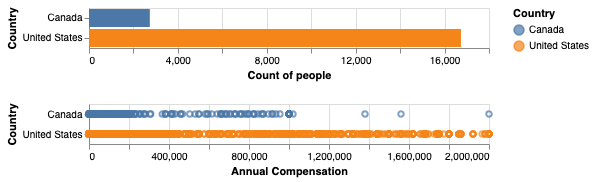

In [8]:
chart_1 = alt.Chart(train_df).mark_point(
).encode(alt.Y('Country', title='Country'), 
         alt.X('ConvertedComp', title='Annual Compensation'), 
         color='Country'
)

chart_2 = alt.Chart(train_df).mark_bar(
).encode(alt.Y('Country', title='Country'), 
         alt.X('count()', title='Count of people'), 
         color='Country'
)

chart_2 & chart_1

From the above Chart, we can see that across professions, the employees in USA earn more than employees in Canada.

In [9]:
code_years = ['10', '5', '6', '8', '4']
code_years_split = train_df.query('YearsCode == @code_years')

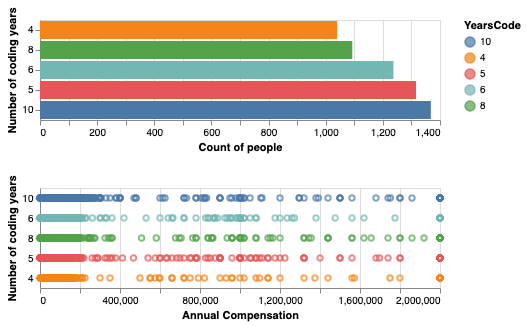

In [10]:
chart_3 = alt.Chart(code_years_split).mark_point(
).encode(alt.Y('YearsCode',sort= 'x', title='Number of coding years'), 
         alt.X('ConvertedComp', title='Annual Compensation'), 
         color='YearsCode'
)

chart_4 = alt.Chart(code_years_split).mark_bar(
).encode(alt.Y('YearsCode',sort= 'x', title='Number of coding years'), 
         alt.X('count()', title='Count of people'), 
         color='YearsCode'
)

chart_4 & chart_3

Majority of the people have been coding for the past 10 years. But the salaries are pretty evenly distributed for the 5 groups.

In [11]:
tech = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Bash/Shell']
tech_split = train_df.query('LanguageWorkedWith == @tech')

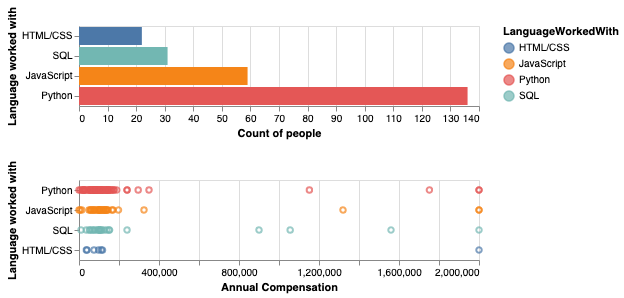

In [12]:
chart_5 = alt.Chart(tech_split).mark_point(
).encode(alt.Y('LanguageWorkedWith', sort= 'x',title='Language worked with'), 
         alt.X('ConvertedComp', title='Annual Compensation'), 
         color='LanguageWorkedWith'
)

chart_6 = alt.Chart(tech_split).mark_bar(
).encode(alt.Y('LanguageWorkedWith',sort= 'x', title='Language worked with'), 
         alt.X('count()', title='Count of people'), 
         color='LanguageWorkedWith'
)

chart_6 & chart_5

From the above graph we see that Python is the most used language and the people who use it have higher salaries.